# Trabajo de título
## Verificación de la complementariedad entre las tecnologías de generación renovables en Chile y servicios complementarios asociados

#### Estudiante: Bryan Levy
#### Profesor guía: Rodrigo Palma

## Importando librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data 

Los datos extraídos de la página del Coordinador Eléctrico corresponden a la generación real durante el periodo comprendido entre enero de 2020 y octubre de 2022

In [ ]:
# Creación de función para importar generación de cada central, en resolución horaria

def cargar_dataset():

    # Vectores que contienen los archivos de los años 2020, 2021 y 2022

    files = ['2020-1.tsv', '2020-2.tsv', '2020-3.tsv', '2020-4.tsv','2020-5.tsv','2020-6.tsv',
                 '2020-7.tsv','2020-8.tsv','2020-9.tsv','2020-10.tsv','2020-11.tsv','2020-12.tsv',
                 '2021-1.tsv', '2021-2.tsv', '2021-3.tsv', '2021-4.tsv','2021-5.tsv','2021-6.tsv',
                 '2021-7.tsv','2021-8.tsv','2021-9.tsv','2021-10.tsv','2021-11.tsv','2021-12.tsv',
                 '2022-1.tsv', '2022-2.tsv', '2022-3.tsv', '2022-4.tsv','2022-5.tsv','2022-6.tsv',
                 '2022-7.tsv','2022-8.tsv','2022-9.tsv']

    # Enlace 'raw' a GitHub que contiene los archivos

    link = 'https://raw.githubusercontent.com/BryanLevy/Memoria/main/Datos%202020-2022/'

    df = pd.DataFrame()  # Se crea el dataframe
    for f in files:  # Acciones a realizar para cada archivo en el vector
        file = link + f  # Se concatena el nombre del archivo al enlace, obteniendo la ubicación de cada archivo
        aux = pd.read_csv(file, sep='\t')  # Se lee en una varbiable auxiliar la información de cada archivo
        df = pd.concat([df,aux])  # Se concatena la información leída de cada archivo al dataframe
    
    df =df.reset_index()  # Se reinicia el índice del dataframe
    
    df = df.drop(df[df['hora_opreal'] > 24].index) # Se borran datos que se encuentran operando en horas imposibles
    df['hora_opreal'] = df['hora_opreal'] - 1  # Se ajusta el rango de operación diario entre las 00:00 hasta las 23:00 hrs 

    df['time'] = df['fecha_opreal'] + ' ' + df['hora_opreal'].astype('str')+':00:00'  # Se define un parámetro que incluye la fecha y la hora de operación
    df['time'] = df['time'].str.replace('-','/')  # Se reemplazan los slash de la fecha por guiones
    df['time'] = pd.to_datetime(df['time'])  # Se deja en formato de tiempo compatible con pandas la fecha y hora de cada dato 
    
    return df  # Se termina de definir la función, retornando df

df = cargar_dataset()  # Se llama a la función recién creada
df = df.drop('central_tipo_nemotecnico', axis=1)  # Se elimina la columna que tiene este parámetro, ya que no se va a utilizar
df  # Se entrega un preview del DataFrame

,index,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,generacion_real_mwh,generacion_real_ernc_mwh,time
0,0,2020-01-01,0,163,HP LIRCAY,Hidráulica,17.400000,17.400000,2020-01-01 00:00:00
1,1,2020-01-01,0,443,PMGD PFV EL LAUREL,Solar,0.000000,0.000000,2020-01-01 00:00:00
2,2,2020-01-01,0,262,PMGD HP EL LLANO,Hidráulica,0.887921,0.887921,2020-01-01 00:00:00
3,3,2020-01-01,0,264,HE ANGOSTURA,Hidráulica,47.000000,0.000000,2020-01-01 00:00:00
4,4,2020-01-01,0,591,PMGD TER ALMENDRADO,Térmica,0.000000,0.000000,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
16516193,604818,2022-09-30,12,217,PMGD HP EL DIUTO,Hidráulica,3.009328,3.009328,2022-09-30 12:00:00
16516194,604819,2022-09-30,13,217,PMGD HP EL DIUTO,Hidráulica,3.009450,3.009450,2022-09-30 13:00:00
16516195,604820,2022-09-30,14,217,PMGD HP EL DIUTO,Hidráulica,3.005573,3.005573,2022-09-30 14:00:00
16516196,604821,2022-09-30,15,217,PMGD HP EL DIUTO,Hidráulica,3.002547,3.002547,2022-09-30 15:00:00


## Manejo y limpieza de datos

In [ ]:
# Se crea otra variable 'gt' para separar los datos de generación de los de la demanda

gt = df #.pivot_table(values='generacion_real_mwh', columns='central_nombre',index='time')
# El dataset extraído corresponde a todas las centrales del país, por lo que extraemos sólo las de interés.

# Datos de generación y la demanda

solar = df[df['central_tipo']=='Solar'] #Datos de las centrales solares.
eolica = df[df['central_tipo']=='Eólica'] # Datos de las centrales eólicas.
hidraulica = df[df['central_tipo']=='Hidráulica'] # Se extrae datos de las centrales hidráulicas.
load = gt.pivot_table(values='generacion_real_mwh', columns='central_nombre',index='time') # Demanda como la suma de toda la generación en el SEN

df = pd.concat([solar,eolica])  # Se concatenan los datos extraídos, estando los PFV primero.
df = df.sort_values(['time'], ascending=True)  # Se reordenan los datos por fecha y hora, de enero a diciembre.
df = df.reset_index()  # Se resetea el indice del dataframe luego de reordenar los datos.

eol = eolica.pivot_table(values='generacion_real_ernc_mwh', columns='central_nombre', index='time')  # Se deja como indice la hora del día (filas), mostrando la generación y cada central en las columnas.
sol = solar.pivot_table(values='generacion_real_ernc_mwh', columns='central_nombre', index='time')  # Se deja como indice la hora del día (filas), mostrando la generación y cada central en las columnas.
hid = hidraulica.pivot_table(values='generacion_real_ernc_mwh', columns='central_nombre', index='time')  # Se deja como indice la hora del día (filas), mostrando la generación y cada central en las columnas.

# Se separan las centrales hidroeléctricas según tipo de central

filtro_pasada = [col for col in hid if col.startswith('HP')]  # Se extraen las columnas que poseen centrales hidroeléctricas de pasada
filtro_embalse = [col for col in hid if col.startswith('HE')]  # Se extraen las columnas que poseen centrales hidroeléctricas de embalse
filtro_pmgd_pasada = [col for col in hid if col.startswith('PMGD HP')]  # Se extraen las columnas que poseen centrales hidroeléctricas de pasada con potencia <20 MW

pasada = hid[filtro_pasada]  # Datos de centrales hidroeléctricas de pasada
embalse = hid[filtro_embalse]  # Datos de centrales hidroeléctricas de embalse
pmgd_pasada = hid[filtro_pmgd_pasada]  # Datos de centrales hidroeléctricas de pasada con potencia <20 MW

df

,level_0,index,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,generacion_real_mwh,generacion_real_ernc_mwh,time
0,1,1,2020-01-01,0,443,PMGD PFV EL LAUREL,Solar,0.0,0.0,2020-01-01 00:00:00
1,398,398,2020-01-01,0,439,PMGD PFV EL SAUCE,Solar,0.0,0.0,2020-01-01 00:00:00
2,401,401,2020-01-01,0,606,PMGD PFV PEDREROS SOLAR,Solar,0.0,0.0,2020-01-01 00:00:00
3,402,402,2020-01-01,0,367,PMGD PFV BELLAVISTA,Solar,0.0,0.0,2020-01-01 00:00:00
4,410,410,2020-01-01,0,399,PFV FINIS TERRAE,Solar,0.0,0.0,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
8007929,16501893,590518,2022-09-30,23,522,PMGD PFV LOS GORRIONES,Solar,0.0,0.0,2022-09-30 23:00:00
8007930,16507598,596223,2022-09-30,23,1763,PMGD PFV PUENTE SOLAR,Solar,0.0,0.0,2022-09-30 23:00:00
8007931,16501845,590470,2022-09-30,23,1914,PMGD PFV EL CASTAÑO,Solar,0.0,0.0,2022-09-30 23:00:00
8007932,16507433,596058,2022-09-30,23,331,PFV PILAR LOS AMARILLOS,Solar,0.0,0.0,2022-09-30 23:00:00


## Suma de potencias

In [ ]:
# Energia y demanda horaria
# Se suman los aportes de cada central según el tipo de tecnología

eol_hor = eol.sum(axis = 1)  # Generación eólica con resolución horaria
sol_hor = sol.sum(axis = 1)  # Generación solar PFV con resolución horaria
hid_hor = hid.sum(axis = 1)  # Generación hidroeléctrica con resolución horaria
load_hor = load.sum(axis = 1)  # Demanda del sistema con resolución horaria

# Funcion para obtener valores mensuales

def valor_mensual(df):

# Se suman los aportes horarios para cada mes y se retorna un array con todos ellos

  ene1 = df.loc['2020-01-01 00:00:00':'2020-01-31 23:00:00'].sum(axis = 0)
  feb1 = df.loc['2020-02-01 00:00:00':'2020-02-28 23:00:00'].sum(axis = 0)
  mar1 = df.loc['2020-03-01 00:00:00':'2020-03-31 23:00:00'].sum(axis = 0)
  abr1 = df.loc['2020-04-01 00:00:00':'2020-04-30 23:00:00'].sum(axis = 0)
  may1 = df.loc['2020-05-01 00:00:00':'2020-05-31 23:00:00'].sum(axis = 0)
  jun1 = df.loc['2020-06-01 00:00:00':'2020-06-30 23:00:00'].sum(axis = 0)
  jul1 = df.loc['2020-07-01 00:00:00':'2020-07-31 23:00:00'].sum(axis = 0)
  ago1 = df.loc['2020-08-01 00:00:00':'2020-08-31 23:00:00'].sum(axis = 0)
  sep1 = df.loc['2020-09-01 00:00:00':'2020-09-30 23:00:00'].sum(axis = 0)
  oct1 = df.loc['2020-10-01 00:00:00':'2020-10-31 23:00:00'].sum(axis = 0)
  nov1 = df.loc['2020-11-01 00:00:00':'2020-11-30 23:00:00'].sum(axis = 0)
  dic1 = df.loc['2020-12-01 00:00:00':'2020-12-31 23:00:00'].sum(axis = 0)
  ene2 = df.loc['2021-01-01 00:00:00':'2021-01-31 23:00:00'].sum(axis = 0)
  feb2 = df.loc['2021-02-01 00:00:00':'2021-02-28 23:00:00'].sum(axis = 0)
  mar2 = df.loc['2021-03-01 00:00:00':'2021-03-31 23:00:00'].sum(axis = 0)
  abr2 = df.loc['2021-04-01 00:00:00':'2021-04-30 23:00:00'].sum(axis = 0)
  may2 = df.loc['2021-05-01 00:00:00':'2021-05-31 23:00:00'].sum(axis = 0)
  jun2 = df.loc['2021-06-01 00:00:00':'2021-06-30 23:00:00'].sum(axis = 0)
  jul2 = df.loc['2021-07-01 00:00:00':'2021-07-31 23:00:00'].sum(axis = 0)
  ago2 = df.loc['2021-08-01 00:00:00':'2021-08-31 23:00:00'].sum(axis = 0)
  sep2 = df.loc['2021-09-01 00:00:00':'2021-09-30 23:00:00'].sum(axis = 0)
  oct2 = df.loc['2021-10-01 00:00:00':'2021-10-31 23:00:00'].sum(axis = 0)
  nov2 = df.loc['2021-11-01 00:00:00':'2021-11-30 23:00:00'].sum(axis = 0)
  dic2 = df.loc['2021-12-01 00:00:00':'2021-12-31 23:00:00'].sum(axis = 0)
  ene3 = df.loc['2022-01-01 00:00:00':'2022-01-31 23:00:00'].sum(axis = 0)
  feb3 = df.loc['2022-02-01 00:00:00':'2022-02-28 23:00:00'].sum(axis = 0)
  mar3 = df.loc['2022-03-01 00:00:00':'2022-03-31 23:00:00'].sum(axis = 0)
  abr3 = df.loc['2022-04-01 00:00:00':'2022-04-30 23:00:00'].sum(axis = 0)
  may3 = df.loc['2022-05-01 00:00:00':'2022-05-31 23:00:00'].sum(axis = 0)
  jun3 = df.loc['2022-06-01 00:00:00':'2022-06-30 23:00:00'].sum(axis = 0)
  jul3 = df.loc['2022-07-01 00:00:00':'2022-07-31 23:00:00'].sum(axis = 0)
  ago3 = df.loc['2022-08-01 00:00:00':'2022-08-31 23:00:00'].sum(axis = 0)
  sep3 = df.loc['2022-09-01 00:00:00':'2022-09-30 23:00:00'].sum(axis = 0)
  d = np.array([ene1,feb1,mar1,abr1,may1,jun1,jul1,ago1,sep1,oct1,nov1,dic1,
                ene2,feb2,mar2,abr2,may2,jun2,jul2,ago2,sep2,oct2,nov2,dic2,
                ene3,feb3,mar3,abr3,may3,jun3,jul3,ago3,sep3])
  
  return d

# Energia y demanda mensual

eol_mes = valor_mensual(eol_hor)  # Generación eólica con resolución mensual
sol_mes = valor_mensual(sol_hor)  # Generación solar con resolución mensual
hid_mes = valor_mensual(hid_hor)  # Generación hidroeléctrica son resolución mensual
load_mes = valor_mensual(load_hor)  # Demanda del sistema con resolución mensual

load_mes

array([6800946.21639165, 6151441.83416631, 6766930.49814338,
       6189233.81231312, 6423743.48294558, 6413637.0782481 ,
       6478176.58156324, 6458686.06451416, 6166922.62410531,
       6440070.33577374, 6366012.85173677, 6875593.39636856,
       6774971.91502476, 6176971.60280994, 6979888.01981397,
       6511001.20004329, 6879096.93983066, 6783654.86619754,
       7143870.90657514, 7063788.34188107, 6545059.98938027,
       6810188.86931109, 6731600.8517113 , 7150727.53109489,
       7031235.56263518, 6418268.26395694, 7132489.50944015,
       6620977.96387281, 7139645.72606742, 7072087.23874047,
       7234529.01667466, 7044553.03769085, 6572423.14289124])

## Indicador

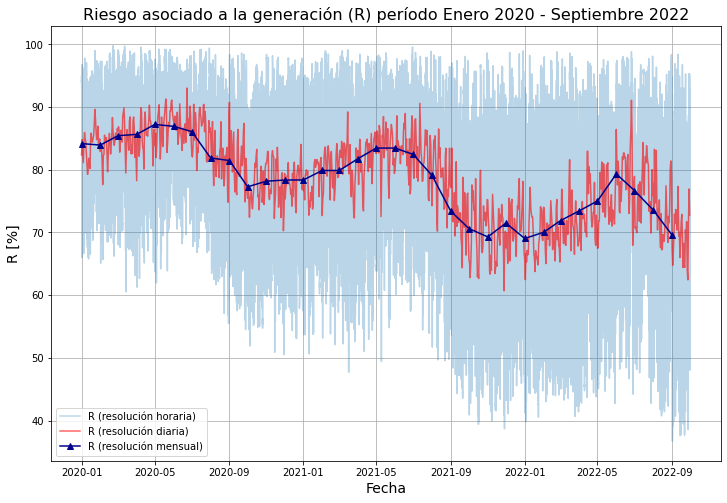

Promedio horario de R 78.95582873141089
Máximo horario de R 99.79633495158163
Mínimo horario de R 36.73274040848031
Desviación estándar horaria de R 15.224023670896072
---
Promedio diario de R 78.44040093908919
Máximo diario de R 93.04659779659332
Mínimo diario de R 60.69305897930356
Desviación estándar diaria de R 6.631249124604821
---
Promedio mensual de R 78.44024508412436
Máximo mensual de R 87.23514953903873
Mínimo mensual de R 69.0420668065946
Desviación estándar mensual de R 5.612419329019272


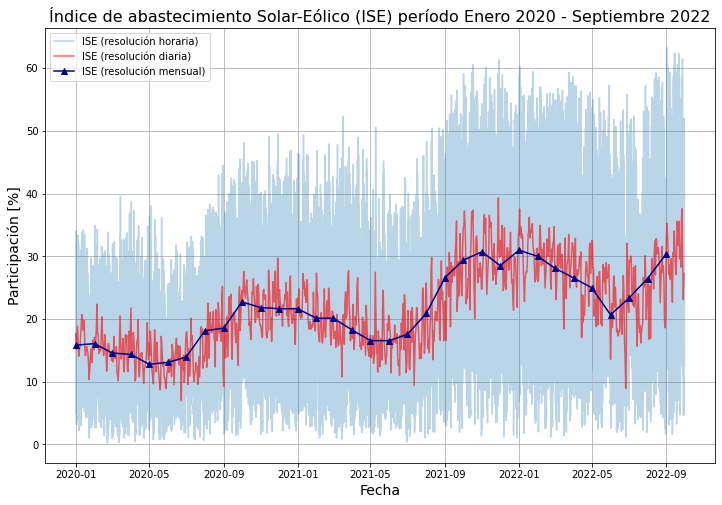

Promedio horario de ISE 21.044171268589107
Máximo horario de ISE 63.26725959151969
Mínimo horario de ISE 0.2036650484183724
Desviación estándar horaria de ISE 15.224023670896072
---
Promedio diario de ISE 21.559599060910813
Máximo diario de ISE 39.30694102069644
Mínimo diario de ISE 6.953402203406682
Desviación estándar diaria de ISE 6.631249124604821
---
Promedio mensual de ISE 21.559754915875654
Máximo mensual de ISE 30.957933193405395
Mínimo mensual de ISE 12.76485046096127
Desviación estándar mensual de ISE 5.612419329019272


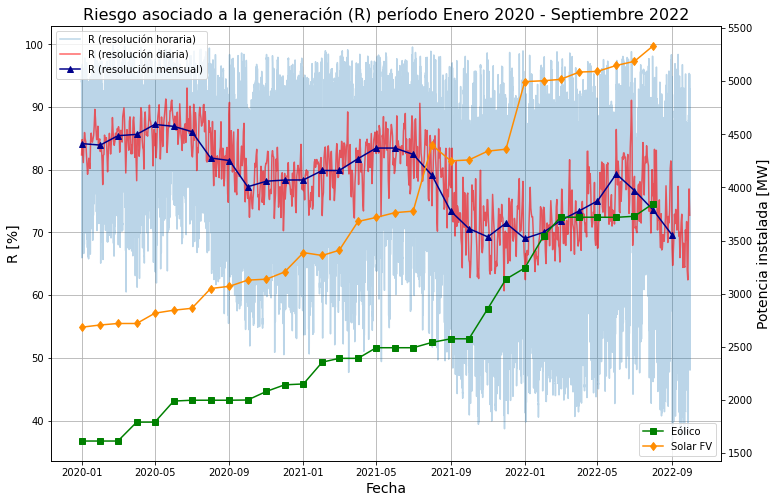

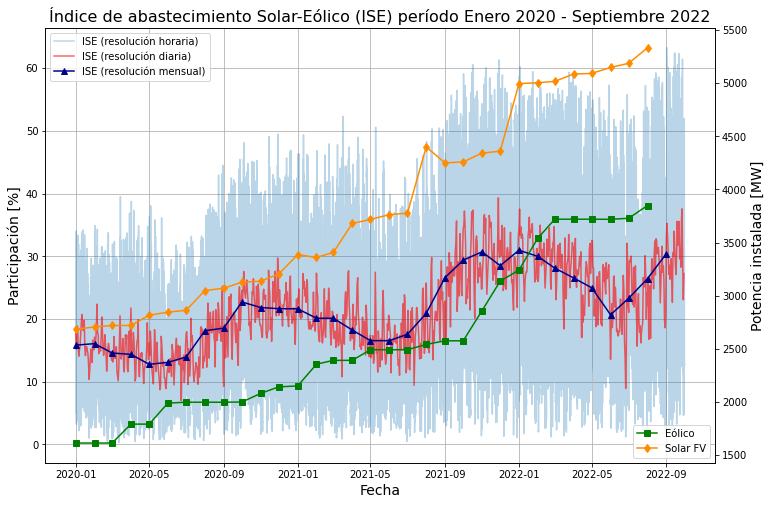

In [ ]:
# Datos a utilizar
g=gt.groupby([gt['time'].dt.date]).sum()
st = solar.groupby([solar['time'].dt.date]).sum()
eol = eolica.groupby([eolica['time'].dt.date]).sum()
hidra = hidraulica.groupby([hidraulica['time'].dt.date]).sum()

# Datos con resolucion diaria en formato array
load_dia = np.array(g['generacion_real_mwh'])
renovable_dia = np.array(g['generacion_real_ernc_mwh'])
sol_dia = np.array(st['generacion_real_mwh'])
eol_dia = np.array(eol['generacion_real_mwh'])
hid_dia = np.array(hidra['generacion_real_mwh'])

# Datos con resolucion horaria en formato array
sol_hor = np.array(sol_hor)
eol_hor = np.array(eol_hor)
hid_hor = np.array(hid_hor)
load_hor = np.array(load_hor)
horas = list(range(8759))

#Datos con resolucion mensual en formato array
load_mes = np.array(load_mes)
sol_mes = np.array(sol_mes)
eol_mes = np.array(eol_mes)
hid_mes = np.array(hid_mes)
fechas = [g.index[0],g.index[31],g.index[60],g.index[91],g.index[121],g.index[152],g.index[182],g.index[213],g.index[244],g.index[274],g.index[305],g.index[335],
          g.index[366],g.index[397],g.index[425],g.index[456],g.index[486],g.index[517],g.index[547],g.index[578],g.index[609],g.index[639],g.index[670],g.index[700],
          g.index[731],g.index[762],g.index[790],g.index[821],g.index[851],g.index[882],g.index[912],g.index[943],g.index[974]]

# Calculo indicador diario
suma_ER_dia = np.add(sol_dia,eol_dia)
resta_ER_load_dia = abs(np.subtract(suma_ER_dia, load_dia))
R_dia_porcentaje = np.divide(resta_ER_load_dia, load_dia)*100 # por cien para el porcentaje
R_dia_cambio = 100 - R_dia_porcentaje

# Calculo indicador horario
suma_ER_hor = np.add(sol_hor,eol_hor)
resta_ER_load_hor = abs(np.subtract(suma_ER_hor, load_hor))
R_hor_porcentaje = np.divide(resta_ER_load_hor, load_hor)*100
R_hor_cambio = 100 - R_hor_porcentaje

# Calculo indicador mensual
suma_ER_mes = np.add(sol_mes,eol_mes)
resta_ER_load_mes = abs(np.subtract(suma_ER_mes, load_mes))
R_mes_porcentaje = np.divide(resta_ER_load_mes, load_mes)*100
R_mes_cambio = 100 - R_mes_porcentaje

plt.figure(figsize=(12,8))
plt.plot(load.index,R_hor_porcentaje,alpha=0.3)
plt.plot(g.index,R_dia_porcentaje,color='red',alpha=0.6)
plt.plot(fechas,R_mes_porcentaje,'-^', color='darkblue')
plt.legend(['R (resolución horaria)','R (resolución diaria)','R (resolución mensual)'],loc=3)
plt.grid()
plt.xlabel('Fecha', fontsize='14')
plt.ylabel('R [%]',fontsize=14)
plt.title('Riesgo asociado a la generación (R) período Enero 2020 - Septiembre 2022',fontsize=16)
plt.show()

print('Promedio horario de R', np.mean(R_hor_porcentaje))
print('Máximo horario de R', np.max(R_hor_porcentaje))
print('Mínimo horario de R', np.min(R_hor_porcentaje))
print('Desviación estándar horaria de R', np.std(R_hor_porcentaje))

print('---')

print('Promedio diario de R', np.mean(R_dia_porcentaje))
print('Máximo diario de R', np.max(R_dia_porcentaje))
print('Mínimo diario de R', np.min(R_dia_porcentaje))
print('Desviación estándar diaria de R', np.std(R_dia_porcentaje))

print('---')

print('Promedio mensual de R', np.mean(R_mes_porcentaje))
print('Máximo mensual de R', np.max(R_mes_porcentaje))
print('Mínimo mensual de R', np.min(R_mes_porcentaje))
print('Desviación estándar mensual de R', np.std(R_mes_porcentaje))

plt.figure(figsize=(12,8))
plt.plot(load.index,R_hor_cambio,alpha=0.3)
plt.plot(g.index,R_dia_cambio,color='red',alpha=0.6)
plt.plot(fechas,R_mes_cambio,'-^', color='darkblue')
plt.legend(['ISE (resolución horaria)','ISE (resolución diaria)','ISE (resolución mensual)'],loc='upper left')
plt.grid()
plt.xlabel('Fecha', fontsize='14')
plt.ylabel('Participación [%]',fontsize=14)
plt.title('Índice de abastecimiento Solar-Eólico (ISE) período Enero 2020 - Septiembre 2022',fontsize=16)
plt.show()

print('Promedio horario de ISE', np.mean(R_hor_cambio))
print('Máximo horario de ISE', np.max(R_hor_cambio))
print('Mínimo horario de ISE', np.min(R_hor_cambio))
print('Desviación estándar horaria de ISE', np.std(R_hor_cambio))

print('---')

print('Promedio diario de ISE', np.mean(R_dia_cambio))
print('Máximo diario de ISE', np.max(R_dia_cambio))
print('Mínimo diario de ISE', np.min(R_dia_cambio))
print('Desviación estándar diaria de ISE', np.std(R_dia_cambio))

print('---')

print('Promedio mensual de ISE', np.mean(R_mes_cambio))
print('Máximo mensual de ISE', np.max(R_mes_cambio))
print('Mínimo mensual de ISE', np.min(R_mes_cambio))
print('Desviación estándar mensual de ISE', np.std(R_mes_cambio))

# Potencia declarada en operación para cada tecnología

p_inst_eolica = dict(ene1=1614, feb1=1614, mar1=1614, abr1=1792, may1=1792,
           jun1=1990, jul1=1998, ago1=1998, sep1=1998, oct1=2000,
           nov1=2081, dic1=2143,
           ene2=2151, feb2=2356, mar2=2392, abr2=2392, may2=2492,
           jun2=2492, jul2=2492, ago2=2542, sep2=2576, oct2=2576,
           nov2=2859, dic2=3137,
           ene3=3242, feb3=3541, mar3=3720, abr3=3720, may3=3720,
           jun3=3719, jul3=3729, ago3=3849) # Potencia instalada según reporte mensual ERNC Energía abierta

p_inst_solar = dict(ene1=2685, feb1=2706, mar1=2720, abr1=2720, may1=2817,
           jun1=2845, jul1=2863, ago1=3049, sep1=3070, oct1=3128,
           nov1=3137, dic1=3205,
           ene2=3387, feb2=3360, mar2=3409, abr2=3680, may2=3718,
           jun2=3763, jul2=3777, ago2=4400, sep2=4250, oct2=4259,
           nov2=4342, dic2=4360,
           ene3=4996, feb3=5004, mar3=5017, abr3=5086, may3=5092,
           jun3=5148, jul3=5187, ago3=5334) # Potencia instalada según reporte mensual ERNC Energía abierta

fechas_2 = [g.index[0],g.index[31],g.index[60],g.index[91],g.index[121],g.index[152],g.index[182],g.index[213],g.index[244],g.index[274],g.index[305],g.index[335],
         g.index[366],g.index[397],g.index[425],g.index[456],g.index[486],g.index[517],g.index[547],g.index[578],g.index[609],g.index[639],g.index[670],g.index[700],
         g.index[731],g.index[762],g.index[790],g.index[821],g.index[851],g.index[882],g.index[912],g.index[943]]

fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()

ax1.plot(load.index,R_hor_porcentaje,alpha=0.3)
ax1.plot(g.index,R_dia_porcentaje, color='red',alpha=0.6)
ax1.plot(fechas,R_mes_porcentaje,'-^', color='darkblue')
ax2.plot(fechas_2,list(p_inst_eolica.values()),'-s', color='green')
ax2.plot(fechas_2,list(p_inst_solar.values()),'-d', color='darkorange')
ax1.grid()
ax1.set_xlabel('Fecha', fontsize='14')
ax1.set_ylabel('R [%]', fontsize=14)
ax2.set_ylabel('Potencia instalada [MW]', fontsize=14)
ax1.legend(['R (resolución horaria)','R (resolución diaria)','R (resolución mensual)'],loc='upper left')
ax2.legend(['Eólico','Solar FV'],loc='lower right')
plt.title('Riesgo asociado a la generación (R) período Enero 2020 - Septiembre 2022',fontsize=16)
plt.show()

fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()

ax1.plot(load.index,R_hor_cambio,alpha=0.3)
ax1.plot(g.index,R_dia_cambio, color='red',alpha=0.6)
ax1.plot(fechas,R_mes_cambio,'-^', color='darkblue')
ax2.plot(fechas_2,list(p_inst_eolica.values()),'-s', color='green')
ax2.plot(fechas_2,list(p_inst_solar.values()),'-d', color='darkorange')
ax1.grid()
ax1.set_xlabel('Fecha', fontsize='14')
ax1.set_ylabel('Participación [%]', fontsize=14)
ax2.set_ylabel('Potencia instalada [MW]', fontsize=14)
ax1.legend(['ISE (resolución horaria)','ISE (resolución diaria)','ISE (resolución mensual)'],loc='upper left')
ax2.legend(['Eólico','Solar FV'],loc='lower right')
plt.title('Índice de abastecimiento Solar-Eólico (ISE) período Enero 2020 - Septiembre 2022',fontsize=16)
plt.show()

In [ ]:
# Creación de función para importar generación de cada central, en resolución horaria

def cargar_dataset_2():

    # Vectores que contienen los archivos de los años 2020, 2021 y 2022

    files = ['2020-1.tsv', '2020-2.tsv', '2020-3.tsv', '2020-4.tsv','2020-5.tsv','2020-6.tsv',
                 '2020-7.tsv','2020-8.tsv','2020-9.tsv','2020-10.tsv','2020-11.tsv','2020-12.tsv',
                 '2021-1.tsv', '2021-2.tsv', '2021-3.tsv', '2021-4.tsv','2021-5.tsv','2021-6.tsv',
                 '2021-7.tsv','2021-8.tsv','2021-9.tsv','2021-10.tsv','2021-11.tsv','2021-12.tsv']

    # Enlace 'raw' a GitHub que contiene los archivos

    link = 'https://raw.githubusercontent.com/BryanLevy/Memoria/main/Datos%202020-2022/'

    df = pd.DataFrame()  # Se crea el dataframe
    for f in files:  # Acciones a realizar para cada archivo en el vector
        file = link + f  # Se concatena el nombre del archivo al enlace, obteniendo la ubicación de cada archivo
        aux = pd.read_csv(file, sep='\t')  # Se lee en una varbiable auxiliar la información de cada archivo
        df = pd.concat([df,aux])  # Se concatena la información leída de cada archivo al dataframe
    
    df =df.reset_index()  # Se reinicia el índice del dataframe
    
    df = df.drop(df[df['hora_opreal'] > 24].index) # Se borran datos que se encuentran operando en horas imposibles
    df['hora_opreal'] = df['hora_opreal'] - 1  # Se ajusta el rango de operación diario entre las 00:00 hasta las 23:00 hrs 

    df['time'] = df['fecha_opreal'] + ' ' + df['hora_opreal'].astype('str')+':00:00'  # Se define un parámetro que incluye la fecha y la hora de operación
    df['time'] = df['time'].str.replace('-','/')  # Se reemplazan los slash de la fecha por guiones
    df['time'] = pd.to_datetime(df['time'])  # Se deja en formato de tiempo compatible con pandas la fecha y hora de cada dato 
    
    return df  # Se termina de definir la función, retornando df

df = cargar_dataset_2()  # Se llama a la función recién creada
df = df.drop('central_tipo_nemotecnico', axis=1)  # Se elimina la columna que tiene este parámetro, ya que no se va a utilizar
df  # Se entrega un preview del DataFrame

,index,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,generacion_real_mwh,generacion_real_ernc_mwh,time
0,0,2020-01-01,0,163,HP LIRCAY,Hidráulica,17.400000,17.400000,2020-01-01 00:00:00
1,1,2020-01-01,0,443,PMGD PFV EL LAUREL,Solar,0.000000,0.000000,2020-01-01 00:00:00
2,2,2020-01-01,0,262,PMGD HP EL LLANO,Hidráulica,0.887921,0.887921,2020-01-01 00:00:00
3,3,2020-01-01,0,264,HE ANGOSTURA,Hidráulica,47.000000,0.000000,2020-01-01 00:00:00
4,4,2020-01-01,0,591,PMGD TER ALMENDRADO,Térmica,0.000000,0.000000,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
11247894,555979,2021-12-31,20,1909,PMGD PFV ERINOME [EN_REVISION],Solar,0.024680,0.024680,2021-12-31 20:00:00
11247895,555980,2021-12-31,20,1910,PMGD PFV PACHIRA,Solar,0.000000,0.000000,2021-12-31 20:00:00
11247896,555981,2021-12-31,20,1914,PMGD PFV EL CASTAÑO,Solar,0.000000,0.000000,2021-12-31 20:00:00
11247897,555982,2021-12-31,20,1915,PMGD PFV SANTA MARGARITA,Solar,0.240735,0.240735,2021-12-31 20:00:00


In [ ]:
# Se crea otra variable 'gt' para separar los datos de generación de los de la demanda

gt = df #.pivot_table(values='generacion_real_mwh', columns='central_nombre',index='time')
# El dataset extraído corresponde a todas las centrales del país, por lo que extraemos sólo las de interés.

# Datos de generación y la demanda

solar = df[df['central_tipo']=='Solar'] #Datos de las centrales solares.
eolica = df[df['central_tipo']=='Eólica'] # Datos de las centrales eólicas.
hidraulica = df[df['central_tipo']=='Hidráulica'] # Se extrae datos de las centrales hidráulicas.
load = gt.pivot_table(values='generacion_real_mwh', columns='central_nombre',index='time') # Demanda como la suma de toda la generación en el SEN

df = pd.concat([solar,eolica])  # Se concatenan los datos extraídos, estando los PFV primero.
df = df.sort_values(['time'], ascending=True)  # Se reordenan los datos por fecha y hora, de enero a diciembre.
df = df.reset_index()  # Se resetea el indice del dataframe luego de reordenar los datos.

eol = eolica.pivot_table(values='generacion_real_ernc_mwh', columns='central_nombre', index='time')  # Se deja como indice la hora del día (filas), mostrando la generación y cada central en las columnas.
sol = solar.pivot_table(values='generacion_real_ernc_mwh', columns='central_nombre', index='time')  # Se deja como indice la hora del día (filas), mostrando la generación y cada central en las columnas.
hid = hidraulica.pivot_table(values='generacion_real_ernc_mwh', columns='central_nombre', index='time')  # Se deja como indice la hora del día (filas), mostrando la generación y cada central en las columnas.

# Se separan las centrales hidroeléctricas según tipo de central

filtro_pasada = [col for col in hid if col.startswith('HP')]  # Se extraen las columnas que poseen centrales hidroeléctricas de pasada
filtro_embalse = [col for col in hid if col.startswith('HE')]  # Se extraen las columnas que poseen centrales hidroeléctricas de embalse
filtro_pmgd_pasada = [col for col in hid if col.startswith('PMGD HP')]  # Se extraen las columnas que poseen centrales hidroeléctricas de pasada con potencia <20 MW

pasada = hid[filtro_pasada]  # Datos de centrales hidroeléctricas de pasada
embalse = hid[filtro_embalse]  # Datos de centrales hidroeléctricas de embalse
pmgd_pasada = hid[filtro_pmgd_pasada]  # Datos de centrales hidroeléctricas de pasada con potencia <20 MW

df

,level_0,index,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,generacion_real_mwh,generacion_real_ernc_mwh,time
0,1,1,2020-01-01,0,443,PMGD PFV EL LAUREL,Solar,0.0,0.0,2020-01-01 00:00:00
1,398,398,2020-01-01,0,439,PMGD PFV EL SAUCE,Solar,0.0,0.0,2020-01-01 00:00:00
2,401,401,2020-01-01,0,606,PMGD PFV PEDREROS SOLAR,Solar,0.0,0.0,2020-01-01 00:00:00
3,402,402,2020-01-01,0,367,PMGD PFV BELLAVISTA,Solar,0.0,0.0,2020-01-01 00:00:00
4,410,410,2020-01-01,0,399,PFV FINIS TERRAE,Solar,0.0,0.0,2020-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
5175444,11235455,543540,2021-12-31,23,1723,PMGD PFV CATEMU,Solar,0.0,0.0,2021-12-31 23:00:00
5175445,11235458,543543,2021-12-31,23,1724,PMGD PFV EL CHUCAO,Solar,0.0,0.0,2021-12-31 23:00:00
5175446,11235461,543546,2021-12-31,23,1725,PMGD PFV JAHUEL,Solar,0.0,0.0,2021-12-31 23:00:00
5175447,11235548,543633,2021-12-31,23,1755,PMGD PFV VICTORIA,Solar,0.0,0.0,2021-12-31 23:00:00


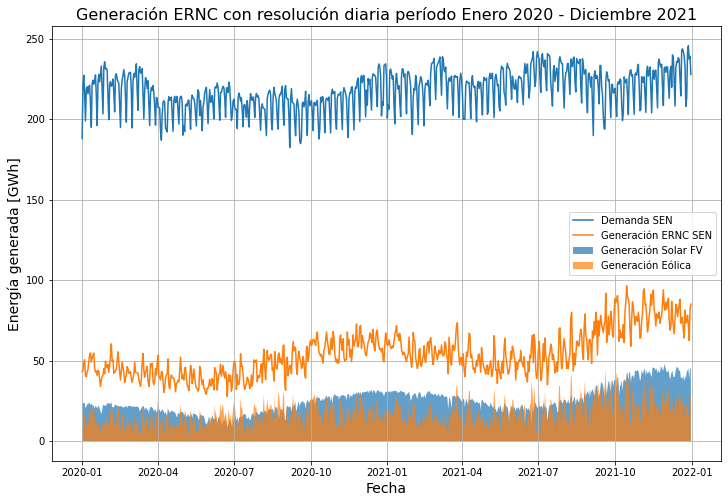

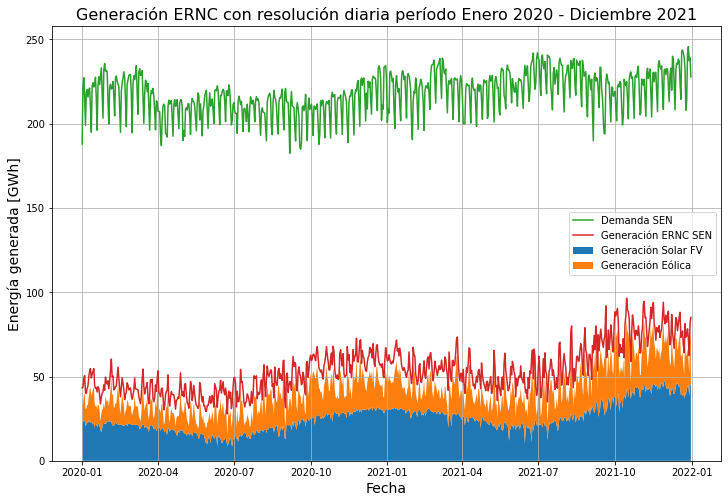

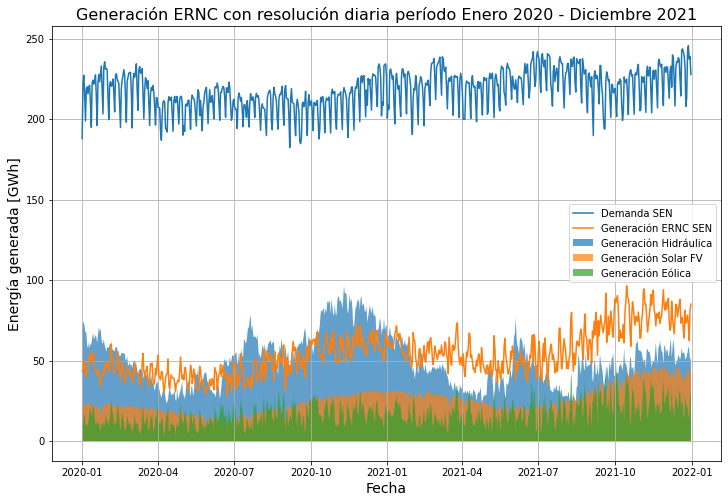

,index,hora_opreal,central_infotecnica_id,generacion_real_mwh,generacion_real_ernc_mwh
time,,,,,
2020-01-01,80283.456,145.728,4492.656,187.930378,43.287530
2020-01-02,240255.084,145.452,4483.632,221.661130,43.567450
2020-01-03,401138.496,145.728,4492.920,227.282019,48.778696
2020-01-04,562934.292,146.004,4533.312,216.096230,50.551533
2020-01-05,724122.708,146.004,4533.312,198.944842,40.545599
...,...,...,...,...,...
2021-12-27,8575010.388,207.828,13231.416,241.621926,78.270806
2021-12-28,8925685.500,208.380,13352.064,245.697579,72.386161
2021-12-29,9278969.892,208.932,13371.336,237.360982,62.468170


In [ ]:
# Energía diaria de cada tecnología y la demanda del sistema

st = solar.groupby([solar['time'].dt.date]).sum()/1000
eol = eolica.groupby([eolica['time'].dt.date]).sum()/1000
hidra = hidraulica.groupby([hidraulica['time'].dt.date]).sum()/1000
g = gt.groupby([gt['time'].dt.date]).sum()/1000

# Graficar generación de energía y demanda en el SEN

plt.figure(figsize=(12,8))
plt.fill_between(st.index,st['generacion_real_mwh'], alpha=0.7)    # plot solar
plt.fill_between(eol.index,eol['generacion_real_mwh'], alpha=0.7)  # plot eólico
plt.plot(g.index,g['generacion_real_mwh'])                         #plot de la demanda
plt.plot(g.index,g['generacion_real_ernc_mwh'])                    # generación total ERNC
plt.legend(['Demanda SEN','Generación ERNC SEN','Generación Solar FV','Generación Eólica'],loc=5)
plt.grid()
plt.xlabel('Fecha', fontsize='14')
plt.ylabel('Energía generada [GWh]',fontsize=14)
plt.title('Generación ERNC con resolución diaria período Enero 2020 - Diciembre 2021',fontsize=16)
plt.show()
st.index

plt.figure(figsize=(12,8))
plt.stackplot(st.index, st['generacion_real_mwh'], eol['generacion_real_mwh'] , labels=['A','B'])
plt.plot(g.index,g['generacion_real_mwh'])                         #plot de la demanda
plt.plot(g.index,g['generacion_real_ernc_mwh'])                    # generación total ERNC
plt.legend(['Demanda SEN','Generación ERNC SEN'],loc=5)
plt.legend(['Demanda SEN','Generación ERNC SEN','Generación Solar FV','Generación Eólica'],loc=5)
plt.grid()
plt.xlabel('Fecha', fontsize='14')
plt.ylabel('Energía generada [GWh]',fontsize=14)
plt.title('Generación ERNC con resolución diaria período Enero 2020 - Diciembre 2021',fontsize=16)
plt.show()
st.index

plt.figure(figsize=(12,8))
plt.fill_between(hidra.index,hidra['generacion_real_mwh'], alpha=0.7)   # plot hidraulico
plt.fill_between(st.index,st['generacion_real_mwh'], alpha=0.7)         # plot solar
plt.fill_between(eol.index,eol['generacion_real_mwh'], alpha=0.7)       # plot eolico
plt.plot(g.index,g['generacion_real_mwh'])                              # plot de la demanda
plt.plot(g.index,g['generacion_real_ernc_mwh'])                         # generacion total ERNC
plt.legend(['Demanda SEN','Generación ERNC SEN','Generación Hidráulica','Generación Solar FV','Generación Eólica'],loc=5)
plt.grid()
plt.xlabel('Fecha', fontsize='14')
plt.ylabel('Energía generada [GWh]',fontsize=14)
plt.title('Generación ERNC con resolución diaria período Enero 2020 - Diciembre 2021',fontsize=16)
plt.show()
st.index

g